##  Análise da Formação Educacional dos Candidatos a Prefeito nas Capitais Brasileiras: Foco na Área da Saúde 🎲 📈 



*por Evelyn Rosa*

A análise da formação educacional dos candidatos a cargos públicos é uma ferramenta fundamental para compreender a composição e diversidade de perfis que buscam ocupar posições de liderança no Brasil. Este estudo tem como objetivo investigar a formação acadêmica e profissional dos candidatos a prefeito nas capitais brasileiras durante as eleições de 2020, com foco especial em candidatos com formação na área da saúde e aqueles com carreira militar.

A pesquisa parte da hipótese de que, impulsionada pela pandemia de COVID-19 e pelo crescente debate em torno das questões de segurança pública, houve um aumento significativo de candidatos com essas formações. Além de examinar os perfis educacionais, o estudo também buscará identificar padrões relacionados a filiações partidárias e regiões de origem desses candidatos, possibilitando uma visão mais ampla sobre como esses perfis se distribuem pelo país.

A metodologia adotada envolve a limpeza e padronização de um dataset contendo informações sobre os candidatos, seguida de uma análise exploratória dos dados, que será complementada por visualizações e métricas detalhadas. A conclusão deste trabalho fornecerá insights valiosos sobre a representatividade de candidatos com formações específicas e poderá servir como base para estudos futuros sobre o impacto de perfis profissionais na política brasileira.

### 1. Introdução e Definição do Problema
A formação educacional dos candidatos a cargos eletivos é um fator essencial para a compreensão do perfil político de um país. No Brasil, as eleições municipais de 2020 foram marcadas por um contexto singular, em que a pandemia de COVID-19 trouxe à tona questões críticas relacionadas à saúde pública e à segurança, influenciando o cenário eleitoral. Neste contexto, a análise da formação acadêmica e das experiências profissionais dos candidatos a prefeito nas capitais brasileiras revela-se especialmente relevante.

Este estudo tem como objetivo investigar a formação educacional e a trajetória profissional dos candidatos a prefeito nas capitais brasileiras, com ênfase em dois grupos específicos: aqueles com formação na área da saúde e aqueles com carreira militar. A hipótese central desta pesquisa é que, impulsionada pela pandemia e pela crescente preocupação com a segurança pública, observou-se um aumento significativo na candidatura de profissionais dessas áreas.

Por meio da análise de um dataset abrangente que contém informações sobre os candidatos, espera-se identificar padrões relevantes na formação educacional, nas filiações partidárias e nas regiões de origem. Essa análise proporcionará uma visão mais clara sobre como as formações acadêmicas podem influenciar a política local e contribuirá para o debate sobre a representatividade e a qualificação dos candidatos que buscam cargos de liderança.



## Importação de Bibliotecas

In [16]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lendo o Dataset

In [17]:
# Lendo o arquivo CSV
df = pd.read_csv('todos_candidatos_prefeito_2020_TM - Capitais.csv')

# Exibindo as primeiras 5 linhas do DataFrame para confirmar a importação
print(df.head())

  SG_UF       NM_UE                             NM_CANDIDATO  \
0    AC  RIO BRANCO  MARIA DO SOCORRO NERI MEDEIROS DE SOUZA   
1    AC  RIO BRANCO               DANIEL QUEIROZ DE SANT ANA   
2    AC  RIO BRANCO                  BELCLADIO JARBAS SOSTER   
3    AC  RIO BRANCO              SEBASTIÃO BOCALOM RODRIGUES   
4    AC  RIO BRANCO                   MINORU MARTINS KINPARA   

  NM_URNA_CANDIDATO SG_PARTIDO  \
0      SOCORRO NERI        PSB   
1        DANIEL ZEN         PT   
2     JARBAS SOSTER     AVANTE   
3      TIÃO BOCALOM         PP   
4    MINORU KINPARA       PSDB   

                             DS_COMPOSICAO_COLIGACAO  \
0  PSB / PODE / PROS / SOLIDARIEDADE / PDT / PV /...   
1                                PT / PSOL / PC do B   
2                 DC / PMN / PMB / PATRIOTA / AVANTE   
3                                           PSD / PP   
4                             CIDADANIA / PSL / PSDB   

                    DS_OCUPACAO ENSINO_MEDIO (completo, incompleto, técni

## Limpeza dos Dados

A limpeza dos dados é uma etapa crucial na análise, pois garante que as informações sejam precisas e utilizáveis. Nesta seção, vamos:

1. Verificar se há valores ausentes no dataset.
2. Considerar a remoção de colunas ou preenchimento de valores ausentes, conforme necessário.
3. Garantir que os tipos de dados sejam apropriados para as análises que pretendemos realizar.

## 1. Verificar Valores Ausentes

In [3]:
# Verificando valores ausentes
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

DS_COMPOSICAO_COLIGACAO                                                 1
ENSINO_MEDIO (completo, incompleto, técnico)                            4
GRAD_2                                                                  1
POS_GRAD                                                                2
Link\n                                                                 80
Informação disponível em site regional/partidario/dividual/linkdin    295
Vinculo empregatício (ocupação formal)                                289
Carreira militar/policial (sim/1 ou não/0)                            293
Carreira militar/policial (ativo ou inativo)                          308
Formação saude (técnico, graduação, pós) - 0 e 1                      286
Atuação na área da saúde (no momento da eleição)                      299
Histórico de troca de partidos                                        308
Partido (s) anteriores                                                308
dtype: int64


## Tratamento de valores ausentes: Formação educacional

Para garantir que as informações educacionais estejam claras, decidimos substituir os valores ausentes das colunas relacionadas ao ensino médio, graduação secundária e pós-graduação por 'Não informado'. 
Essa abordagem ajuda a manter a consistência dos dados e a evitar confusão durante a análise.


In [4]:
# Passo 1: Substituir valores ausentes em colunas importantes por "Não informado"
# As colunas 'ENSINO_MEDIO (completo, incompleto, técnico)', 'GRAD_2', e 'POS_GRAD' são fundamentais para entender a formação educacional dos candidatos. Portanto, valores ausentes serão substituídos por 'Não informado'.

df['ENSINO_MEDIO (completo, incompleto, técnico)'].fillna('Não informado', inplace=True)
df['GRAD_2'].fillna('Não informado', inplace=True)
df['POS_GRAD'].fillna('Não informado', inplace=True)


## Remoção de coluna: Vínculo empregatício
A coluna de vínculo empregatício não será usada na análise. Optamos por removê-la para simplificar o conjunto de dados.

In [5]:
# Passo 2: Remover a coluna 'Vinculo empregatício (ocupação formal)'
# Essa coluna não será utilizada na análise, então vamos removê-la.

df.drop(columns=['Vinculo empregatício (ocupação formal)'], inplace=True)


## Preenchimento de valores ausentes: Carreira militar/policial
A ausência de dados sobre carreira militar/policial será tratada como 'Não', preenchendo os valores ausentes com 0. Isso facilita a análise futura desses dados.


In [6]:
# Passo 3: Preencher a coluna 'Carreira militar/policial (sim/1 ou não/0)' com 0
# Como a ausência de informações nesta coluna pode ser interpretada como 'Não', vamos preencher os valores ausentes com 0.

df['Carreira militar/policial (sim/1 ou não/0)'].fillna(0, inplace=True)


## Manutenção da coluna Link
A coluna que contém os links usados na coleta de informações será mantida como está. Os valores ausentes indicam dados que ainda precisam ser verificados ou completados.


In [ ]:
# Passo 4: Manter a coluna 'Link\n' e decidir como preencher valores ausentes
# A coluna 'Link\n' contém URLs que foram a fonte das informações coletadas, por isso é importante preservá-la. Para lidar com os valores ausentes, podemos mantê-los como NaN para investigar manualmente depois.

# Não é necessário alterar os valores ausentes da coluna de links por enquanto, mas podemos deixar a seguinte anotação:
#df['Link\n'].fillna('A investigar', inplace=True)  # Se optar por adicionar um texto, pode usar esse código.


## Remoção de colunas: Pesquisa futura
As colunas 'Histórico de troca de partidos', 'Atuação na área da saúde' e 'Partido(s) anteriores' foram removidas para simplificar o dataset neste momento, mas serão investigadas em pesquisas futuras. Isso será indicado no planejamento da análise.

In [7]:
df.drop(columns=['Histórico de troca de partidos', 'Atuação na área da saúde (no momento da eleição)', 'Partido (s) anteriores'], inplace=True)


In [9]:
# Passo 5: Remover as colunas 'Histórico de troca de partidos', 'Atuação na área da saúde' e 'Partido (s) anteriores', com indicação futura para pesquisa
# Essas colunas não serão utilizadas na análise atual, mas são relevantes para futuras pesquisas. Vamos removê-las e deixar isso claro no notebook.



## Padronização das Colunas Categóricas

Nesta seção, vamos padronizar as colunas categóricas do nosso DataFrame. A padronização é importante para garantir a consistência dos dados e facilitar as análises futuras. 

### Colunas a serem padronizadas:

1. **DS_OCUPACAO**: Padronizaremos as ocupações, removendo espaços extras e transformando tudo para minúsculas.
2. **SG_PARTIDO**: Manteremos a sigla dos partidos como está, garantindo que estejam no formato correto.
3. **GRAD_1** e **GRAD_2**: Padronizaremos as formações, removendo espaços e transformando para minúsculas.
4. **POS_GRAD**: Padronizaremos da mesma forma que as graduações.
5. **ENSINO_MEDIO**: Substituiremos valores por "não informado" onde necessário.


In [10]:
# 1. DS_OCUPACAO
df['DS_OCUPACAO'] = df['DS_OCUPACAO'].str.strip().str.lower()

In [11]:
# 2. SG_PARTIDO
# Manter como está, apenas checando se há siglas não padronizadas.


In [20]:
# Renomeando a coluna para remover caracteres especiais
df.rename(columns={'\nGRAD_1': 'GRAD_1'}, inplace=True)

# Agora você pode aplicar a padronização
df['GRAD_1'] = df['GRAD_1'].fillna('').str.strip().str.lower()

In [21]:
# 4. GRAD_2
df['GRAD_2'] = df['GRAD_2'].str.strip().str.lower()


In [22]:
# 5. POS_GRAD
df['POS_GRAD'] = df['POS_GRAD'].str.strip().str.lower()


In [23]:
# 6. ENSINO_MEDIO
df['ENSINO_MEDIO (completo, incompleto, técnico)'] = df['ENSINO_MEDIO (completo, incompleto, técnico)'].replace(
    ['completo', 'incompleto', 'técnico'], 
    ['completo', 'não informado', 'não informado'])

### 7. Verificação das Colunas Numéricas

Neste passo, vamos verificar as colunas numéricas do DataFrame para garantir que não haja inconsistências, valores ausentes ou tipos de dados incorretos.

#### 7.1 Identificar as Colunas Numéricas

Primeiro, vamos exibir informações sobre o DataFrame para identificar quais colunas são numéricas.


In [24]:
# Mostrando informações sobre o DataFrame para identificar colunas numéricas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 20 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   SG_UF                                                               308 non-null    object 
 1   NM_UE                                                               308 non-null    object 
 2   NM_CANDIDATO                                                        308 non-null    object 
 3   NM_URNA_CANDIDATO                                                   308 non-null    object 
 4   SG_PARTIDO                                                          308 non-null    object 
 5   DS_COMPOSICAO_COLIGACAO                                             307 non-null    object 
 6   DS_OCUPACAO                                                         308 non-null    object 
 7   ENSINO_MEDIO (com

### 6. Tratamento de Valores Ausentes

Após realizar a análise do DataFrame, identificamos colunas que ainda contêm valores ausentes. Abaixo, descrevemos as estratégias de preenchimento para garantir a integridade dos dados.

#### 6.1. DS_COMPOSICAO_COLIGACAO
A coluna `DS_COMPOSICAO_COLIGACAO` possui 1 valor ausente. Optamos por preenchê-lo com 'Não informado', uma vez que essa informação é relevante para a análise.

In [25]:
df['DS_COMPOSICAO_COLIGACAO'].fillna('Não informado', inplace=True)

#### 6.2. ENSINO_MEDIO, GRAD_2 e POS_GRAD
As colunas ENSINO_MEDIO, GRAD_2 e POS_GRAD ainda possuem alguns valores ausentes. Para garantir a consistência dos dados, esses valores serão substituídos por 'Não informado'.

In [26]:
df['ENSINO_MEDIO (completo, incompleto, técnico)'].fillna('Não informado', inplace=True)
df['GRAD_2'].fillna('Não informado', inplace=True)
df['POS_GRAD'].fillna('Não informado', inplace=True)

### 6.3. Link
A coluna Link contém 80 valores ausentes. Para manter a integridade dos dados, decidimos deixar esses valores como estão. Como alternativa, podemos preenchê-los com 'A investigar', caso isso ajude a sinalizar a necessidade de verificação.

In [29]:
df.columns = df.columns.str.strip()  # Remove espaços em branco dos nomes das colunas
df['Link'].fillna('A investigar', inplace=True)  # Preenche valores ausentes na coluna Link

### 6.4. Informação disponível em site regional
A coluna Informação disponível em site regional/partidario/dividual/linkdin apresenta 295 valores ausentes. Como essa coluna não é crítica para a análise, optamos por removê-la.

In [30]:
df.drop(columns=['Informação disponível em site regional/partidario/dividual/linkdin'], inplace=True)

### 6.5. Carreira militar/policial
A coluna Carreira militar/policial (sim/1 ou não/0) ainda possui valores ausentes. Para simplificar a análise, decidimos preenchê-los com 0, interpretando a ausência de informações como 'Não'.

In [31]:
df['Carreira militar/policial (sim/1 ou não/0)'].fillna(0, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   SG_UF                                             308 non-null    object 
 1   NM_UE                                             308 non-null    object 
 2   NM_CANDIDATO                                      308 non-null    object 
 3   NM_URNA_CANDIDATO                                 308 non-null    object 
 4   SG_PARTIDO                                        308 non-null    object 
 5   DS_COMPOSICAO_COLIGACAO                           308 non-null    object 
 6   DS_OCUPACAO                                       308 non-null    object 
 7   ENSINO_MEDIO (completo, incompleto, técnico)      308 non-null    object 
 8   GRAD_1                                            308 non-null    object 
 9   GRAD_2               

## Tratamento de Valores Ausentes e Remoções

Após revisar os valores ausentes e as colunas do DataFrame, tomamos as seguintes decisões:

1. **Remoções de Colunas:**
   - **Histórico de troca de partidos:** Esta coluna foi removida, pois não contém dados relevantes (0 não nulos).
   - **Partido (s) anteriores:** Também foi removida por não apresentar informações úteis (0 não nulos).
   - **Vínculo empregatício (ocupação formal):** Removida para simplificar o conjunto de dados.
   
2. **Colunas Mantidas:**
   - **Formação saúde (técnico, graduação, pós) - 0 e 1:** Mantida para avaliação futura, pois é um dado importante.
   - **Carreira militar/policial (sim/1 ou não/0):** Mantida para análise.


In [34]:
# Removendo colunas desnecessárias
df.drop(columns=['Vinculo empregatício (ocupação formal)', 
                 'Histórico de troca de partidos', 
                 'Partido (s) anteriores'], inplace=True)

### Verificando o DataFrame
Após as remoções, verificamos o estado do DataFrame novamente:

# Mostrando informações sobre o DataFrame atualizado


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   SG_UF                                             308 non-null    object 
 1   NM_UE                                             308 non-null    object 
 2   NM_CANDIDATO                                      308 non-null    object 
 3   NM_URNA_CANDIDATO                                 308 non-null    object 
 4   SG_PARTIDO                                        308 non-null    object 
 5   DS_COMPOSICAO_COLIGACAO                           308 non-null    object 
 6   DS_OCUPACAO                                       308 non-null    object 
 7   ENSINO_MEDIO (completo, incompleto, técnico)      308 non-null    object 
 8   GRAD_1                                            308 non-null    object 
 9   GRAD_2               

### Considerações sobre os Dados Faltantes

Durante o processo de limpeza do dataset, foram identificadas duas colunas com grande quantidade de valores nulos: **"Carreira militar/policial (ativo ou inativo)"** e **"Atuação na área da saúde"**. Ambas as colunas são de grande relevância para a pesquisa, uma vez que visam mapear perfis de candidatos com atuação militar e na área da saúde. No entanto, devido à falta de dados disponíveis no momento, optou-se por remover essas colunas da análise atual.

É importante destacar que essas informações podem ser de extrema utilidade para estudos futuros, caso seja possível obter ou complementar os dados. A inclusão de dados sobre a situação ativa ou inativa dos candidatos com carreira militar, bem como sobre a atuação dos candidatos com formação na área da saúde no momento das eleições, forneceria insights mais precisos sobre esses perfis profissionais e suas respectivas influências no cenário político.

Portanto, recomenda-se que essas colunas sejam reavaliadas em estudos subsequentes, utilizando fontes complementares ou base de dados mais abrangentes.

In [39]:
print(df.columns)

# Removendo as colunas com os nomes exatamente como estão no DataFrame
df = df.drop(columns=["Carreira militar/policial (sim/1 ou não/0)", "Atuação na área da saúde (no momento da eleição)"])

# Verificando o DataFrame após a remoção
print(df.info())

Index(['SG_UF', 'NM_UE', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO',
       'DS_COMPOSICAO_COLIGACAO', 'DS_OCUPACAO',
       'ENSINO_MEDIO (completo, incompleto, técnico)', 'GRAD_1', 'GRAD_2',
       'POS_GRAD', 'Link', 'Carreira militar/policial (sim/1 ou não/0)',
       'Carreira militar/policial (ativo ou inativo)',
       'Formação saude (técnico, graduação, pós) - 0 e 1',
       'Atuação na área da saúde (no momento da eleição)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   SG_UF                                             308 non-null    object 
 1   NM_UE                                             308 non-null    object 
 2   NM_CANDIDATO                                      308 non-null    object 
 3   NM_URNA_CANDIDATO         

In [40]:
# Removendo a coluna "Carreira militar/policial (ativo ou inativo)"
df = df.drop(columns=["Carreira militar/policial (ativo ou inativo)"])

# Verificando o DataFrame após a remoção
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   SG_UF                                             308 non-null    object 
 1   NM_UE                                             308 non-null    object 
 2   NM_CANDIDATO                                      308 non-null    object 
 3   NM_URNA_CANDIDATO                                 308 non-null    object 
 4   SG_PARTIDO                                        308 non-null    object 
 5   DS_COMPOSICAO_COLIGACAO                           308 non-null    object 
 6   DS_OCUPACAO                                       308 non-null    object 
 7   ENSINO_MEDIO (completo, incompleto, técnico)      308 non-null    object 
 8   GRAD_1                                            308 non-null    object 
 9   GRAD_2               

### Tratamento da Coluna de Formação na Área da Saúde

A coluna **"Formação saúde (técnico, graduação, pós) - 0 e 1"** contém informações sobre a formação acadêmica dos candidatos na área da saúde, onde `1` indica que o candidato possui formação na área e `0` indica que não possui. No entanto, observou-se que a coluna possui uma quantidade significativa de valores nulos.

Para facilitar a análise e garantir a consistência dos dados, optou-se por preencher esses valores nulos com `0`. Essa abordagem implica que os candidatos que não têm formação na área da saúde serão corretamente representados, permitindo uma análise mais robusta dos perfis dos candidatos.

Essa modificação garantirá que a análise subsequente reflita de forma precisa a presença ou ausência de formação na área da saúde entre os candidatos a prefeito nas capitais brasileiras, ajudando a mapear a representatividade de profissionais dessa área no contexto político.

In [41]:
# Preenchendo valores nulos com 0
df['Formação saude (técnico, graduação, pós) - 0 e 1'] = df['Formação saude (técnico, graduação, pós) - 0 e 1'].fillna(0)

# Verificando o DataFrame após o preenchimento
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   SG_UF                                             308 non-null    object 
 1   NM_UE                                             308 non-null    object 
 2   NM_CANDIDATO                                      308 non-null    object 
 3   NM_URNA_CANDIDATO                                 308 non-null    object 
 4   SG_PARTIDO                                        308 non-null    object 
 5   DS_COMPOSICAO_COLIGACAO                           308 non-null    object 
 6   DS_OCUPACAO                                       308 non-null    object 
 7   ENSINO_MEDIO (completo, incompleto, técnico)      308 non-null    object 
 8   GRAD_1                                            308 non-null    object 
 9   GRAD_2               

## Análises Descritivas
### Contagem de Candidatos com Formação em Saúde:

In [ ]:
# Contagem de candidatos com formação na área da saúde
total_saude = df['Formação saude (técnico, graduação, pós) - 0 e 1'].value_counts()
print(total_saude)

vamos analisar graficamente essa distribuição:

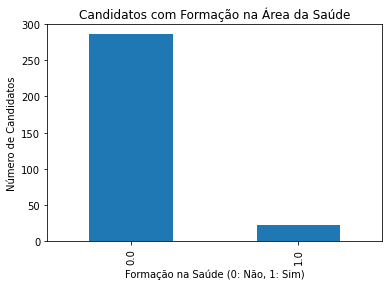

In [43]:
total_saude.plot(kind='bar', title='Candidatos com Formação na Área da Saúde')
plt.xlabel('Formação na Saúde (0: Não, 1: Sim)')
plt.ylabel('Número de Candidatos')
plt.show()

O resultado mostra que, entre os 308 candidatos:

286 não possuem formação na área da saúde (valor 0).
22 possuem formação na área da saúde (valor 1).
Esse é um dado interessante, pois mostra uma baixa representatividade de candidatos com formação na área da saúde

### Distribuição de Candidatos por Partido:

In [44]:
# Contagem de candidatos por partido
total_partidos = df['SG_PARTIDO'].value_counts()
print(total_partidos)

PSOL             23
PT               21
PCO              15
PSDB             15
MDB              15
PSTU             14
PSL              13
PRTB             11
NOVO             11
PC do B          11
PATRIOTA         11
SOLIDARIEDADE    10
PODE             10
PSB              10
REPUBLICANOS      9
PSD               9
PP                9
PROS              8
PV                8
CIDADANIA         8
PL                8
DEM               8
PDT               7
PSC               7
AVANTE            7
UP                6
DC                5
PMB               5
REDE              5
PTC               3
PTB               3
PMN               2
PCB               1
Name: SG_PARTIDO, dtype: int64


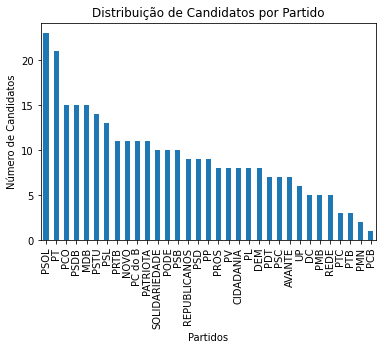

In [45]:
total_partidos.plot(kind='bar', title='Distribuição de Candidatos por Partido')
plt.xlabel('Partidos')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=90)
plt.show()

A distribuição de candidatos por partido mostra uma grande diversidade, com 33 partidos diferentes representados. Os partidos com maior número de candidatos a prefeito nas capitais brasileiras em 2020 são:

PSOL: 23 candidatos
PT: 21 candidatos
PCO, PSDB, MDB: 15 candidatos cada
PSTU: 14 candidatos
Essa análise ajuda a entender como os diferentes partidos estão distribuídos em termos de candidaturas.

### Cruzamento de Dados (Formação na Saúde vs. Partido): Para explorar a relação entre formação na área da saúde e partido:

In [46]:
saude_por_partido = df.groupby(['SG_PARTIDO', 'Formação saude (técnico, graduação, pós) - 0 e 1']).size().unstack()
print(saude_por_partido)

Formação saude (técnico, graduação, pós) - 0 e 1   0.0  1.0
SG_PARTIDO                                                 
AVANTE                                             6.0  1.0
CIDADANIA                                          8.0  NaN
DC                                                 4.0  1.0
DEM                                                8.0  NaN
MDB                                               13.0  2.0
NOVO                                              10.0  1.0
PATRIOTA                                          11.0  NaN
PC do B                                           11.0  NaN
PCB                                                1.0  NaN
PCO                                               15.0  NaN
PDT                                                6.0  1.0
PL                                                 7.0  1.0
PMB                                                2.0  3.0
PMN                                                2.0  NaN
PODE                                    

O cruzamento de dados entre formação na área da saúde e partido revela alguns pontos interessantes:

### Partidos com maior número de candidatos com formação na saúde:

PSOL: 3 candidatos com formação na saúde.
PMB: 3 candidatos com formação na saúde.
MDB: 2 candidatos com formação na saúde.
PV e SOLIDARIEDADE: 2 candidatos cada.
Muitos partidos possuem apenas um ou nenhum candidato com formação na área da saúde. Por exemplo, CIDADANIA, DEM, PATRIOTA, e PT não possuem candidatos com essa formação (valores "NaN" indicam que não há candidatos com formação na saúde).

Esses dados sugerem que a representatividade de candidatos com formação na área da saúde varia significativamente entre os partidos. Alguns partidos, como PSOL e PMB, têm uma maior concentração desses candidatos, enquanto outros, como PT e PCO, não possuem nenhum candidato com essa formação.

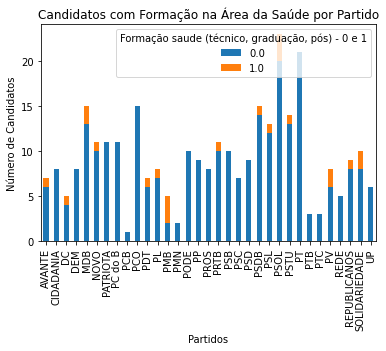

In [47]:
saude_por_partido.plot(kind='bar', stacked=True, title='Candidatos com Formação na Área da Saúde por Partido')
plt.xlabel('Partidos')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=90)
plt.show()

### Cruzamento de Dados: Formação em Saúde e Regiões

Neste passo, vamos realizar o cruzamento dos dados de formação em saúde dos candidatos a prefeito com as regiões do Brasil. O objetivo é verificar se há alguma correlação entre a distribuição geográfica dos candidatos e sua formação na área da saúde.

### 1. Mapeamento das Regiões do Brasil
Para realizar o cruzamento, primeiro precisamos categorizar os estados de acordo com suas respectivas regiões (Norte, Nordeste, Centro-Oeste, Sudeste e Sul). Para isso, criamos um dicionário em Python que associa as siglas dos estados às suas regiões.

In [50]:
# Dicionário para mapear os estados às suas regiões
regioes = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste',
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
}

Com esse dicionário, é possível mapear automaticamente os estados presentes no nosso dataset para as suas respectivas regiões.

### 2. Criando a Coluna de Região no Dataset
Agora, aplicamos o mapeamento criado para adicionar uma nova coluna chamada Região ao DataFrame, que vai categorizar cada candidato de acordo com o estado onde concorreu.

In [51]:
# Adicionando a coluna de região no DataFrame
df['Região'] = df['SG_UF'].map(regioes)

Esse passo garante que cada linha do nosso dataset possua a informação da região do Brasil correspondente ao estado do candidato.

### 3. Cruzando os Dados de Formação em Saúde com as Regiões
Com a coluna de região criada, podemos agora cruzar esses dados com a coluna de formação em saúde, utilizando uma tabela cruzada (crosstab). Isso nos permitirá ver quantos candidatos em cada região possuem ou não formação na área da saúde.

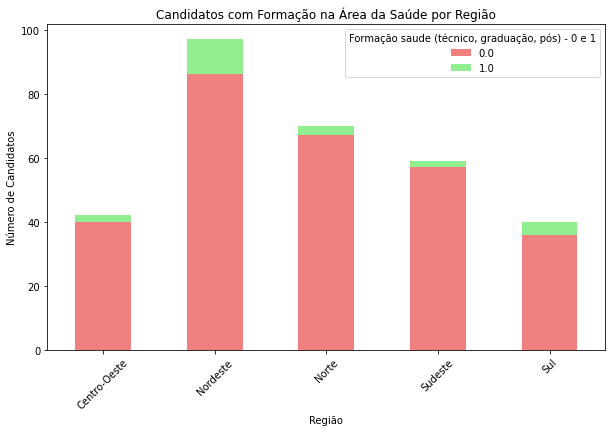

In [52]:
# Tabela cruzada entre Formação na área da saúde e Região
cross_regiao_saude = pd.crosstab(df['Região'], df['Formação saude (técnico, graduação, pós) - 0 e 1'])

# Plotando o gráfico de barras empilhadas
cross_regiao_saude.plot(kind='bar', stacked=True, figsize=(10,6), color=['lightcoral', 'lightgreen'])

# Adicionando rótulos e título
plt.xlabel('Região')
plt.ylabel('Número de Candidatos')
plt.title('Candidatos com Formação na Área da Saúde por Região')
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.show()

Neste gráfico de barras empilhadas, visualizamos a quantidade de candidatos por região, separados entre aqueles que possuem formação na área da saúde (valor 1) e os que não possuem (valor 0).

### Análise do Gráfico: Candidatos com Formação na Área da Saúde por Região
O gráfico acima apresenta a distribuição de candidatos a prefeito nas eleições de 2020, separando aqueles que possuem formação na área da saúde (técnico, graduação, ou pós) dos que não possuem, conforme a região do Brasil. Abaixo está uma análise detalhada dos principais pontos:

1. Distribuição Geral
O gráfico de barras empilhadas nos mostra a quantidade de candidatos de cada região, sendo que as barras vermelhas representam candidatos sem formação na área da saúde (valor 0) e as barras verdes representam candidatos com essa formação (valor 1).
2. Região Nordeste
A Região Nordeste se destaca com o maior número de candidatos (aproximadamente 90), com uma proporção relativamente baixa de candidatos com formação na área da saúde.
Embora tenha uma das maiores quantidades de candidatos com formação na área da saúde (aproximadamente 10), a grande maioria dos candidatos nesta região não possui essa formação.
3. Região Norte
A Região Norte possui uma quantidade mediana de candidatos em comparação às demais regiões, mas chama atenção pela maior proporção de candidatos com formação na saúde.
Aproximadamente 10% dos candidatos no Norte têm essa formação.
4. Região Sudeste
No Sudeste, observa-se uma grande quantidade de candidatos (aproximadamente 60), mas com uma pequena presença de candidatos com formação na área da saúde.
A proporção de candidatos sem essa formação é bastante expressiva.
5. Região Centro-Oeste
O Centro-Oeste apresenta o menor número de candidatos dentre todas as regiões, com cerca de 40 candidatos.
Apenas uma pequena fração dos candidatos possui formação na área da saúde.
6. Região Sul
A Região Sul tem a menor quantidade de candidatos no total, e também uma pequena quantidade de candidatos com formação na área da saúde.

### Conclusões:
Baixa representatividade de candidatos da área da saúde:

Como você já apontou, apenas 22 candidatos, ou cerca de 7%, possuem formação na área da saúde. Isso indica uma baixa representatividade dessa formação em um contexto político onde questões de saúde pública, como a pandemia, têm grande relevância.
Partidos com maior ênfase na saúde:

PSOL e PMB parecem ter maior foco em candidatos com formação na saúde, possivelmente refletindo pautas relacionadas à saúde pública em suas plataformas. Em contraste, partidos maiores, como PT e DEM, não possuem candidatos com essa formação.
Disparidade regional:

A análise sugere que o Nordeste tem a maior quantidade de candidatos a prefeito, mas o Norte apresenta uma maior proporção de candidatos com formação na saúde. Isso pode indicar um foco maior em saúde pública em regiões com menor acesso a serviços de saúde.